In [127]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import datetime

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

import xgboost as xgb

## 1.Load data

In [128]:
df_channel = pd.read_csv('orders_channels.csv')
df_country = pd.read_csv('orders_country.csv')
df_tickets = pd.read_csv('orders_tickets.csv')

## 2. Exploratory Data Analysis (EDA) and Data Preprocessing

In [129]:
df_channel.head()

,id,date,channel_id
0,10173,2017-06-12,39.0
1,95062,2017-09-11,35.0
2,171081,2017-07-05,39.0
3,122867,2017-08-18,39.0
4,107186,2017-11-23,NaN


In [130]:
df_channel.shape

(2054059, 3)

In [131]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054059 entries, 0 to 2054058
Data columns (total 3 columns):
id            int64
date          object
channel_id    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ MB


In [132]:
df_channel['date'].isnull().sum()

0

In [133]:
df_channel['channel_id'].isnull().sum()

295625

In [134]:
df_channel['channel_id'].unique()

array([39., 35., nan, 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

In [135]:
len(df_channel['channel_id'].unique())

30

fill channel_id nan with -1

In [136]:
df_channel['channel_id'].fillna(-1, inplace=True)

In [137]:
df_channel['channel_id'].unique()

array([39., 35., -1., 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

In [138]:
df_channel.hist(column='channel_id', bins=len(df_channel['channel_id'].unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1266f6a0>]],
      dtype=object)

In [139]:
df_channel['date'] = pd.to_datetime(df_channel['date'])

In [140]:
df_country.head()

,id,country_1,country_2
0,10503,24.0,NaN
1,79360,24.0,0
2,81388,24.0,15
3,82828,24.0,9
4,38756,23.0,NaN


In [141]:
df_country.shape

(1917668, 3)

In [142]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917668 entries, 0 to 1917667
Data columns (total 3 columns):
id           int64
country_1    float64
country_2    object
dtypes: float64(1), int64(1), object(1)
memory usage: 43.9+ MB


In [143]:
df_country.describe()

,id,country_1
count,1.917668e+06,1.899837e+06
mean,9.850860e+05,1.896349e+01
std,5.687706e+05,7.798312e+00
min,1.000000e+00,4.000000e+00
25%,4.926018e+05,1.100000e+01
50%,9.849825e+05,2.400000e+01
75%,1.477636e+06,2.400000e+01
max,1.970544e+06,3.200000e+01


In [144]:
df_country['country_1'].isnull().sum()

17831

In [145]:
df_country['country_1'].unique()

array([24., 23., 19., 11., 12.,  9.,  4., 29., 14.,  5., 20., 26., 27.,
        8., 21.,  7., 32., nan, 28., 17., 15., 31., 16., 22.])

In [146]:
df_country['country_2'].isnull().sum()

748932

In [147]:
df_country['country_2'].unique()

array([nan, '0', '15', '9', '13', '4', '2', '6', '17', '8', '14', '20',
       '16', '12', '3', '19', '18', '11', 'xx', '1', '7'], dtype=object)

replace country nan with -1
replace country xx with -2

In [148]:
df_country['country_1'].fillna(-1, inplace=True)
df_country['country_2'].fillna(-1, inplace=True)
def f(x):
    if x=='xx':
        return '-2'
    return x
df_country['country_2'] = df_country['country_2'].apply(f)

In [149]:
df_country['country_1'].unique()

array([24., 23., 19., 11., 12.,  9.,  4., 29., 14.,  5., 20., 26., 27.,
        8., 21.,  7., 32., -1., 28., 17., 15., 31., 16., 22.])

In [150]:
df_country['country_2'].unique()

array([-1, '0', '15', '9', '13', '4', '2', '6', '17', '8', '14', '20',
       '16', '12', '3', '19', '18', '11', '-2', '1', '7'], dtype=object)

convert string to integer for country_2

In [151]:
df_country['country_2'] = pd.to_numeric(df_country['country_2'])
df_country['country_2'].unique()

array([-1,  0, 15,  9, 13,  4,  2,  6, 17,  8, 14, 20, 16, 12,  3, 19, 18,
       11, -2,  1,  7])

convert float into integer for country_1

In [152]:
df_country['country_1'] = df_country['country_1'].astype(int)
df_country['country_2'].unique()

array([-1,  0, 15,  9, 13,  4,  2,  6, 17,  8, 14, 20, 16, 12,  3, 19, 18,
       11, -2,  1,  7])

In [153]:
#le = LabelEncoder()
#le.fit(df_country['country_2'].tolist())
#df_country['country_2'] = le.transform(df_country['country_2'].tolist())

In [154]:
df_country.hist(column='country_1', bins=len(df_country['country_1'].unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a576668>]],
      dtype=object)

In [155]:
df_country.hist(column='country_2', bins=len(df_country['country_2'].unique()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a6d94a8>]],
      dtype=object)

In [156]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917668 entries, 0 to 1917667
Data columns (total 3 columns):
id           int64
country_1    int64
country_2    int64
dtypes: int64(3)
memory usage: 43.9 MB


In [157]:
df_country.head()

,id,country_1,country_2
0,10503,24,-1
1,79360,24,0
2,81388,24,15
3,82828,24,9
4,38756,23,-1


In [158]:
df_tickets.head()

,id,n_tickets,type
0,1586391,2,pax
1,438232,2,pax
2,270896,1,pax
3,1181593,2,pax
4,964842,1,pax


In [159]:
df_tickets.shape

(1999716, 3)

In [160]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999716 entries, 0 to 1999715
Data columns (total 3 columns):
id           int64
n_tickets    int64
type         object
dtypes: int64(2), object(1)
memory usage: 45.8+ MB


In [161]:
df_tickets['type'].unique()

array(['pax', 'other'], dtype=object)

In [162]:
df_tickets['n_tickets'].unique()

array([ 2,  1,  8,  4,  6,  5,  3, 12, 10,  7, 14, 20, 60,  9, 13, 11, 22,
       28, 15, 31, 40, 18, 24, 32, 26, 19, 16, 54, 44, 21, 23, 30, 56, 81,
       38, 52, 25, 17, 29, 34, 39, 49, 80, 66, 36, 42, 64, 27, 48, 46, 50,
       35, 41, 76, 70, 57, 58, 43, 45, 33, 68, 74, 67, 65, 47, 84, 37])

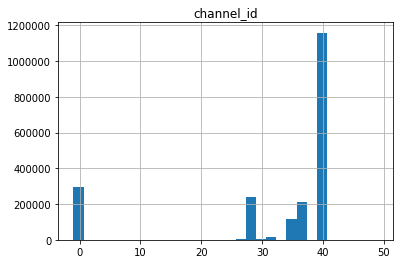

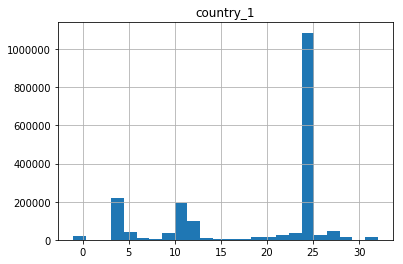

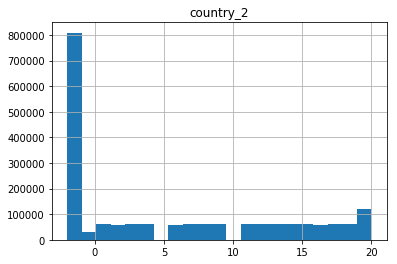

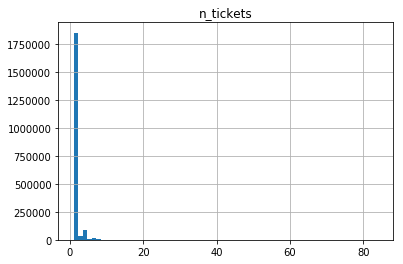

In [163]:
df_tickets.hist(column='n_tickets', bins=len(df_tickets['n_tickets'].unique()))
plt.show()

In [164]:
print(df_tickets['n_tickets'].min())
print(df_tickets['n_tickets'].max())
print(df_tickets['n_tickets'].mean())

1
84
1.4876737496724535


## 3. Data Preparation

In [165]:
df_merged = pd.merge(df_channel, df_tickets, how='left', on=['id'])

In [166]:
df_merged.head()

,id,date,channel_id,n_tickets,type
0,10173,2017-06-12,39.0,2,pax
1,95062,2017-09-11,35.0,1,pax
2,171081,2017-07-05,39.0,1,pax
3,122867,2017-08-18,39.0,1,other
4,107186,2017-11-23,-1.0,2,pax


In [167]:
df_merged = pd.merge(df_merged, df_country, how='left', on=['id'])

In [168]:
df_merged.head()

,id,date,channel_id,n_tickets,type,country_1,country_2
0,10173,2017-06-12,39.0,2,pax,24.0,-1.0
1,95062,2017-09-11,35.0,1,pax,12.0,-1.0
2,171081,2017-07-05,39.0,1,pax,4.0,11.0
3,122867,2017-08-18,39.0,1,other,24.0,17.0
4,107186,2017-11-23,-1.0,2,pax,12.0,20.0


In [169]:
df_merged['country_1'].unique()

array([24., 12.,  4., 11., 26., 27., 16.,  9.,  5., 29., nan,  7., 15.,
       23., 31., 19., -1., 20., 21., 32., 14.,  8., 28., 17., 22.])

In [170]:
df_merged['country_1'].fillna(-1, inplace=True)

In [171]:
df_merged['country_1'].unique()

array([24., 12.,  4., 11., 26., 27., 16.,  9.,  5., 29., -1.,  7., 15.,
       23., 31., 19., 20., 21., 32., 14.,  8., 28., 17., 22.])

In [172]:
df_merged['country_1'] = df_merged['country_1'].astype(int)
df_merged['country_1'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22])

In [173]:
df_merged['country_2'].unique()

array([-1., 11., 17., 20.,  4., 14., 12., -2., 13.,  7.,  8., 16.,  1.,
       15., 19., nan,  3., 18.,  9.,  2.,  6.,  0.])

In [174]:
df_merged['country_2'].fillna(-1, inplace=True)

In [175]:
df_merged['country_2'] = df_merged['country_2'].astype(int)
df_merged['country_2'].unique()

array([-1, 11, 17, 20,  4, 14, 12, -2, 13,  7,  8, 16,  1, 15, 19,  3, 18,
        9,  2,  6,  0])

In [176]:
df_merged['channel_id'].unique()

array([39., 35., -1., 28., 37., 40., 31., 49., 26., 29.,  2.,  1., 33.,
       17., 30., 25., 23., 38., 43., 36.,  5., 42., 41., 24.,  4., 27.,
       32., 47.,  8., 13.])

In [177]:
df_merged['channel_id'] = df_merged['channel_id'].astype(int)

In [178]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [179]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084458 entries, 0 to 2084457
Data columns (total 7 columns):
id            int64
date          datetime64[ns]
channel_id    int64
n_tickets     int64
type          object
country_1     int64
country_2     int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 127.2+ MB


In [180]:
df_merged.head()

,id,date,channel_id,n_tickets,type,country_1,country_2
0,10173,2017-06-12,39,2,pax,24,-1
1,95062,2017-09-11,35,1,pax,12,-1
2,171081,2017-07-05,39,1,pax,4,11
3,122867,2017-08-18,39,1,other,24,17
4,107186,2017-11-23,-1,2,pax,12,20


#### some orders are assigned to two countries, with country_1 being more important. if there is no value in "country_1", use "country_2"

In [181]:
df_merged['country'] = df_merged['country_1'].values

In [182]:
df_merged['country'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22])

In [183]:
df_merged['country'] = df_merged['country'].apply(lambda x: df_merged['country_2'] if x==1 else x)

In [184]:
df_merged['country'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22])

In [185]:
df_merged['country'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22])

In [186]:
df_merged.head()

,id,date,channel_id,n_tickets,type,country_1,country_2,country
0,10173,2017-06-12,39,2,pax,24,-1,24
1,95062,2017-09-11,35,1,pax,12,-1,12
2,171081,2017-07-05,39,1,pax,4,11,4
3,122867,2017-08-18,39,1,other,24,17,24
4,107186,2017-11-23,-1,2,pax,12,20,12


In [187]:
df_merged['country'].isnull().sum()

0

In [188]:
df_merged.head()

,id,date,channel_id,n_tickets,type,country_1,country_2,country
0,10173,2017-06-12,39,2,pax,24,-1,24
1,95062,2017-09-11,35,1,pax,12,-1,12
2,171081,2017-07-05,39,1,pax,4,11,4
3,122867,2017-08-18,39,1,other,24,17,24
4,107186,2017-11-23,-1,2,pax,12,20,12


In [189]:
df_merged['month'] = df_merged['date'].dt.month
df_merged['day'] = df_merged['date'].dt.day
df_merged['year'] = df_merged['date'].dt.year

In [190]:
df_merged.head()

,id,date,channel_id,n_tickets,type,country_1,country_2,country,month,day,year
0,10173,2017-06-12,39,2,pax,24,-1,24,6,12,2017
1,95062,2017-09-11,35,1,pax,12,-1,12,9,11,2017
2,171081,2017-07-05,39,1,pax,4,11,4,7,5,2017
3,122867,2017-08-18,39,1,other,24,17,24,8,18,2017
4,107186,2017-11-23,-1,2,pax,12,20,12,11,23,2017


In [191]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084458 entries, 0 to 2084457
Data columns (total 11 columns):
id            int64
date          datetime64[ns]
channel_id    int64
n_tickets     int64
type          object
country_1     int64
country_2     int64
country       int64
month         int64
day           int64
year          int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 190.8+ MB


save the merged dataframe to a csv

In [192]:
df_merged.to_csv('df_merged.csv', index=False)

In [193]:
df_merged['country'].unique()

array([24, 12,  4, 11, 26, 27, 16,  9,  5, 29, -1,  7, 15, 23, 31, 19, 20,
       21, 32, 14,  8, 28, 17, 22])

### Approach 1

For each group (channel, country) 
- Train a regression model on the features (year, month, day) and label (number of tickets).
- Generate a test sample. The date of the test sample is the last date of the train sample in the sample group plus 10 days.
- Predict the label (number of tickets) of the test sample with the trained model.


In [194]:
df_merged = pd.read_csv('df_merged.csv')
df_merged['date'] = pd.to_datetime(df_merged['date'])
#df_merged['country'] = pd.to_numeric(df_merged['country'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084458 entries, 0 to 2084457
Data columns (total 11 columns):
id            int64
date          datetime64[ns]
channel_id    int64
n_tickets     int64
type          object
country_1     int64
country_2     int64
country       int64
month         int64
day           int64
year          int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 174.9+ MB


In [195]:
df_merged['date'].min()

Timestamp('2017-01-01 00:00:00')

In [196]:
df_merged['date'].max()

Timestamp('2018-02-26 00:00:00')

In [197]:
df_merged['channel_id'].unique()

array([39, 35, -1, 28, 37, 40, 31, 49, 26, 29,  2,  1, 33, 17, 30, 25, 23,
       38, 43, 36,  5, 42, 41, 24,  4, 27, 32, 47,  8, 13])

In [198]:
df_merged_grouped = df_merged.groupby(['channel_id', 'country'])

In [199]:
#prepare the output
dict_test = {'date':[], 'country':[], 'channel_id':[], 'n_tickets':[]}

# for each group, train a regression model and predict the number of tickets in the 10 days after the end
for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # features are month and day, label is the number of tickets
    x_train = group[['year', 'month', 'day']]
    y_train = group[['n_tickets']]
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)

    model = Ridge()
    model.fit(x_train_scaled, y_train)
    
    date_test = group.iloc[-1]['date'] + pd.Timedelta(days=10)
    x_test = np.array([date_test.year, date_test.month, date_test.day]).reshape(1,3)
    x_test_scaled = scaler.transform(x_test)
    y_test = model.predict(x_test_scaled)

    # use the trained linear regression model to predict the number of the tickets in the 10 days after the end of the group
    dict_test['date'].append(date_test)
    dict_test['country'].append(group.iloc[0]['country'])
    dict_test['channel_id'].append(group.iloc[0]['channel_id'])
    if round(y_test[0][0]) < 0:
        y_test[0][0] = 0
    dict_test['n_tickets'].append(round(y_test[0][0]))


/Users/kai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [200]:
df_test = pd.DataFrame(dict_test)

In [201]:
df_test

,channel_id,country,date,n_tickets
0,-1,-1,2018-03-08,1.0
1,-1,4,2018-03-08,1.0
2,-1,5,2018-03-08,1.0
3,-1,7,2018-03-08,2.0
4,-1,8,2018-03-08,1.0
5,-1,9,2018-03-08,1.0
6,-1,11,2018-03-08,1.0
7,-1,12,2018-03-08,1.0
8,-1,14,2018-03-08,2.0
9,-1,15,2018-03-07,1.0


In [202]:
set(df_test['n_tickets'].tolist())

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 11.0}

save prediction results to a csv

In [203]:
df_test.to_csv('pred_approach1_ridge.csv', index=False)

### Approach 2 (does not work)

- Train a regression model on all the data. The features are: date (year, month, day), channel, and country. The label is the number of tickets.
- For each group (channel, country), create a test sample as presented in Approach 1.
- Use the trained regression model to predict the number of tickets of all the test samples.

In [ ]:
df_merged = pd.read_csv('df_merged.csv')
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.info()

In [ ]:
df_merged.columns

#### Prepare the training set

In [ ]:
cols_feature = ['channel_id', 'country', 'year', 'month', 'day']

In [ ]:
len(cols_feature)

In [ ]:
x_train = df_merged[cols_feature]

In [ ]:
x_train.shape

In [ ]:
y_train = df_merged[['n_tickets']]

In [ ]:
y_train.shape

#### Prepare the test set

In [ ]:
df_merged_grouped = df_merged.groupby(['channel_id', 'country'])

In [ ]:
dict_test = {'date':[], 'country':[], 'channel_id':[], 'n_tickets':[]}
for col_feature in cols_feature:
    dict_test[col_feature] = []

In [ ]:
dict_test

In [ ]:
df_test = pd.DataFrame(dict_test)

In [ ]:
cols_feature

In [ ]:
for name,group in df_merged_grouped:
    group = group.sort_values(by=['date'])
    
    # get the last date of the group
    date_test = group.iloc[-1]['date'] + pd.Timedelta(days=10)

    # generate test sample
    dict_test['date'].append(date_test)
    dict_test['n_tickets'] = 0
    for col_feature in cols_feature:
        dict_test[col_feature].append(group.iloc[0][col_feature])   

In [ ]:
df_test = pd.DataFrame(dict_test)
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['year'] = df_test['date'].dt.year

In [ ]:
df_test.info()

In [ ]:
x_test = df_test[cols_feature]

In [ ]:
x_test.shape

#### Model training

xgboost

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
https://www.kaggle.com/mburakergenc/predictions-with-xgboost-and-linear-regression

One advantage of tree based model is that it works directly on the categorical features. No one-hot and feature scaling are needed.

In [ ]:
import xgboost as xgb

x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size = 0.1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dsubtrain = xgb.DMatrix(x_train_sub, label=y_train_sub)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    #'eval_metric':'mae',
    'eval_metric':'rmse',
    'n_estimators': 200,
}

model = xgb.train(
    params,
    dsubtrain,
    num_boost_round = 100,
    evals = [(dval, "Test")],
    early_stopping_rounds = 5
)


#### Prediction

In [ ]:
predicted = model.predict(dtest)
df_test['n_tickets'] = list(predicted)
df_test['n_tickets'] = df_test['n_tickets'].astype(int)
df_test.head()

In [ ]:
df_test['n_tickets'].unique()

In [ ]:
df_test.hist(column='n_tickets', bins=len(df_test['n_tickets'].unique()))
plt.show()

In [ ]:
for col_to_drop in ['year', 'month', 'day']:
    if col_to_drop in df_test.columns:
        df_test.drop(col_to_drop, inplace=True, axis=1)

In [ ]:
df_test.head()

#### Saving prediction 

In [ ]:
df_test.to_csv('pred_approach2_xgboost.csv', index=False)

#### Hyperparameter tuning

In [ ]:
best_params = ()

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    #'eval_metric':'mae',
    'eval_metric':'rmse',
}

cv_results = {}

# Define initial best params and RMSE
min_rmse = float("Inf")

best_params = None

gridsearch_params = [
    (max_depth, min_child_weight)
    #for max_depth in range(9,12)
    for max_depth in [2, 4, 6, 8]
    for min_child_weight in [5, 6, 8]
    #for min_child_weight in range(5,8)
]


for (max_depth, min_child_weight) in gridsearch_params:
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=200,
        seed=42,
        nfold=3,
        #metrics={'mae'},
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    # Update best MAE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth, min_child_weight)
        print("update best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [ ]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

model = xgb.train(
    params,
    dsubtrain,
    num_boost_round=100,
    evals=[(dval, "Test")],
    early_stopping_rounds=5
)

In [ ]:
predicted = model.predict(dtest)
df_test['n_tickets'] = list(predicted)
df_test['n_tickets'] = df_test['n_tickets'].astype(int)
df_test.head()

In [ ]:
df_test['n_tickets'].unique()

In [ ]:
df_test.hist(column='n_tickets', bins=len(df_test['n_tickets'].unique()))
plt.show()

In [ ]:
for col_to_drop in ['year', 'month', 'day']:
    if col_to_drop in df_test.columns:
        df_test.drop(columns=[col_to_drop], inplace=True)

In [ ]:
df_test.to_csv('pred_approach2_xgboost_max-depth-{}_min-child-weight-{}.csv'.format(params['max_depth'], params['min_child_weight']), index=False)

#### TODO: for other no-tree based model one-hot encoding on categorical features is needed

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [ ]:
cols_cat = ['channel_id', 'country']
for col_cat in cols_cat:
    one_hot = pd.get_dummies(df_merged[col_cat], prefix=col_cat)
    #df_merged = df_merged.drop(col_cat, axis = 1)
    df_merged = df_merged.join(one_hot)

In [ ]:
cols_feature = list(df_merged.columns) 
for col_remove in ['id', 'channel_id', 'country', 'date', 'n_tickets', 'type', 'country_1', 'country_2']:
    cols_feature.remove(col_remove)

#### TODO: Check cross validation scores for different regression model
https://stackoverflow.com/questions/24132237/scikit-learn-cross-validation-scoring-for-regression

In [ ]:
loo = cross_validation.LeaveOneOut(len(y_train))

In [ ]:
scores = cross_validation.cross_val_score(LinearRegression(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

In [ ]:
scores = cross_validation.cross_val_score(Lasso(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

In [ ]:
scores = cross_validation.cross_val_score(Ridge(), x_train, y_train, scoring='mean_squared_error', cv=loo,)

In [ ]:
scores

#### TODO: Train a regression model with parameter tuning
https://stackoverflow.com/questions/49522928/cross-validation-in-linear-regression


In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Ridge())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=4, verbose=2)
grid.fit(x_train, y_train)



In [ ]:
predicted = grid.predict(x_test)
dict_test['n_tickets'] = y_test


In [ ]:
dict_test

In [ ]:
df_test.to_csv('pred_approach2_xgboost.csv', index=False)

#### TODO: Try other regression models
https://gogul09.github.io/software/sklearn-regression-models

## 3. Conclusion